## Práctica con yfinance: Métricas de Desempeño  📈

### Objetivo:
Aprender a calcular y analizar el rendimiento histórico de una acción utilizando técnicas comunes de análisis financiero con Python y Pandas.

#### Paso 1: Descargar datos

In [17]:
import yfinance as yf
import pandas as pd
import numpy as np

In [18]:
#@title Seleccione Acción y Fecha {run:'auto'}
ticker = "MSFT" #@param ["AAPL", "MSFT", "NVDA", "GOOGL", "AMZN", "META", "TSM","BRK.B", "V", "JPM", "XOM", "LLY", "MRK", "UNH", "PG", "MA","CVX", "KO", "PEP", "COST", "TMO", "ORCL", "CSCO", "NKE", "VZ", "ASML", "TXN", "ABT", "TM", "SAP", "AMD", "NFLX", "NOW", "ADBE", "LVMUY", "BABA", "SHEL", "TMUS", "QCOM", "PFE", "SNY", "AZN", "TOT", "GSK", "RIO", "BHP", "MCD​"]
cripto=False #@param {type:'boolean'}

#ticker = "BTC-USD" #@param ["BTC-USD", "ETH-USD", "USDT-USD", "XRP-USD", "LTC-USD", "ADA-USD", "DOT-USD", "BCH-USD", "XLM-USD", "LINK-USD"]
#cripto=True #@param {type:'boolean'}

start_date = '2022-01-01' #@param {type:'date'}
end_date = '2025-08-20' #@param {type:'date'}



In [19]:

df = yf.download(ticker, start=start_date, end=end_date, auto_adjust=True)
display(df)
df =df[["Close"]].copy()
df.dropna()  # Limpieza básica NaN


# isinstance() checks if the DataFrame's column index is a pandas.MultiIndex.
# A MultiIndex often occurs when downloading data for multiple tickers with yf.download,
# where column names become a tuple like ('Close', 'AAPL'). However, it can occasionally
# still appear even for a single ticker depending on the yfinance version or settings.
if isinstance(df.columns, pd.MultiIndex):
    df.columns = df.columns.get_level_values(0) # If a MultiIndex is detected, this line flattens it.
                                                # It replaces the column names with the values from the
                                                # first level (index position 0) of the MultiIndex, 
                                                # typically removing the redundant ticker symbol from the 
                                                # column name (e.g., it converts ('Close', 'AAPL') to just 'Close').
print(f"\n Ticker: {ticker}")
df
# DataFrame o la estructura de los datos para trabajar con ella


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT
Date,,,,,
2022-01-03,324.504608,327.655138,319.686719,325.086250,28865100
2022-01-04,318.940308,324.940858,316.138745,324.582158,32674300
2022-01-05,306.696838,316.090267,306.309087,315.886673,40054300
2022-01-06,304.273346,308.945831,301.956480,303.565678,39646100
2022-01-07,304.428497,306.813198,300.599379,304.535116,32720000
...,...,...,...,...,...
2025-08-13,519.725647,531.825751,518.517611,531.236692,19619200
2025-08-14,521.622498,525.086834,519.286372,521.702383,20269100



 Ticker: MSFT


Price,Close
Date,
2022-01-03,324.504608
2022-01-04,318.940308
2022-01-05,306.696838
2022-01-06,304.273346
2022-01-07,304.428497
...,...
2025-08-13,519.725647
2025-08-14,521.622498
2025-08-15,519.316284


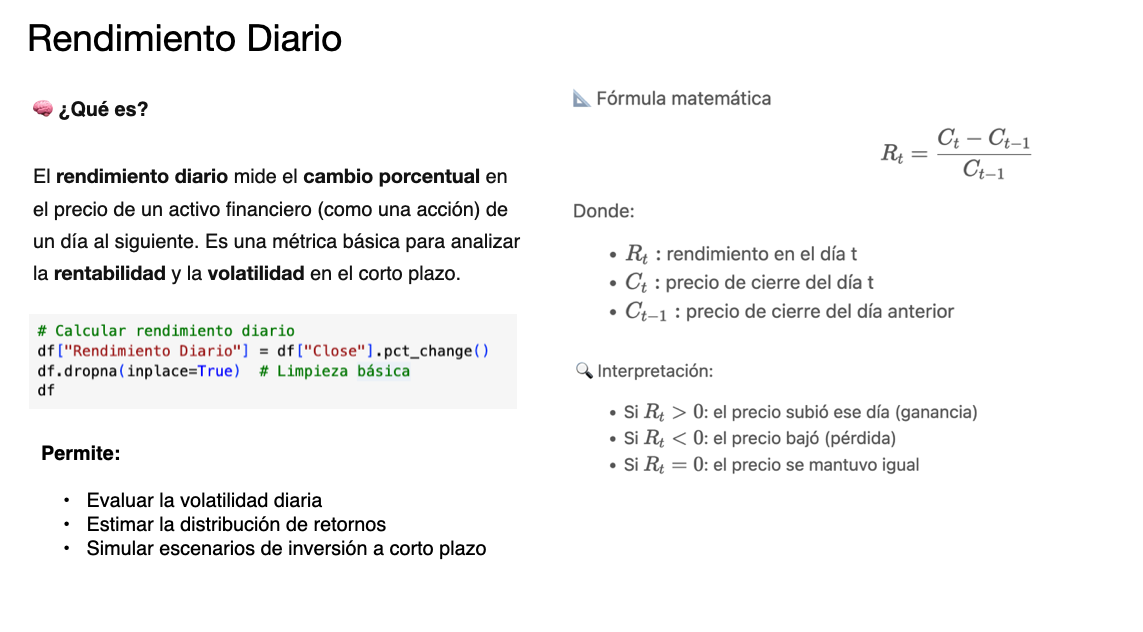

### Calcular el rendimiento diario (pct_change)

In [20]:
# Calcular rendimiento diario
df["Rendimiento Diario"] = df["Close"].pct_change()
df.dropna(inplace=True)  # Limpieza básica
print(f"\n Ticker: {ticker}")
df


 Ticker: MSFT


Price,Close,Rendimiento Diario
Date,,
2022-01-04,318.940308,-0.017147
2022-01-05,306.696838,-0.038388
2022-01-06,304.273346,-0.007902
2022-01-07,304.428497,0.000510
2022-01-10,304.651398,0.000732
...,...,...
2025-08-13,519.725647,-0.016363
2025-08-14,521.622498,0.003650
2025-08-15,519.316284,-0.004421


#### Pregunta:
* ¿Por qué se tuvo que realizar una limpieza básica?

Respuesta: Se ejecuta esta función df.dropna(inplace=True) para eliminar los NaN
* ¿Cuál fue el rendimiento más alto y más bajo en un solo día?
* ¿Cuántos días tuvieron rendimiento negativo?

In [21]:
# prompt: * ¿Cuál fue el rendimiento más alto y más bajo en un solo día?

max_rendimiento = df["Rendimiento Diario"].max()
min_rendimiento = df["Rendimiento Diario"].min()

print(f"\n Ticker: {ticker}")
print(f"El rendimiento más alto en un solo día fue: {max_rendimiento:.4%}")
print(f"El rendimiento más bajo en un solo día fue: {min_rendimiento:.4%}")


 Ticker: MSFT
El rendimiento más alto en un solo día fue: 10.1337%
El rendimiento más bajo en un solo día fue: -7.7156%


In [22]:
# prompt: * ¿Cuántos días tuvieron rendimiento negativo?

dias_negativos = (df["Rendimiento Diario"] < 0).sum()

print(f"\n Ticker: {ticker}")
print(f" 📅 Número de días con rendimiento negativo: {dias_negativos}")


 Ticker: MSFT
 📅 Número de días con rendimiento negativo: 435




---



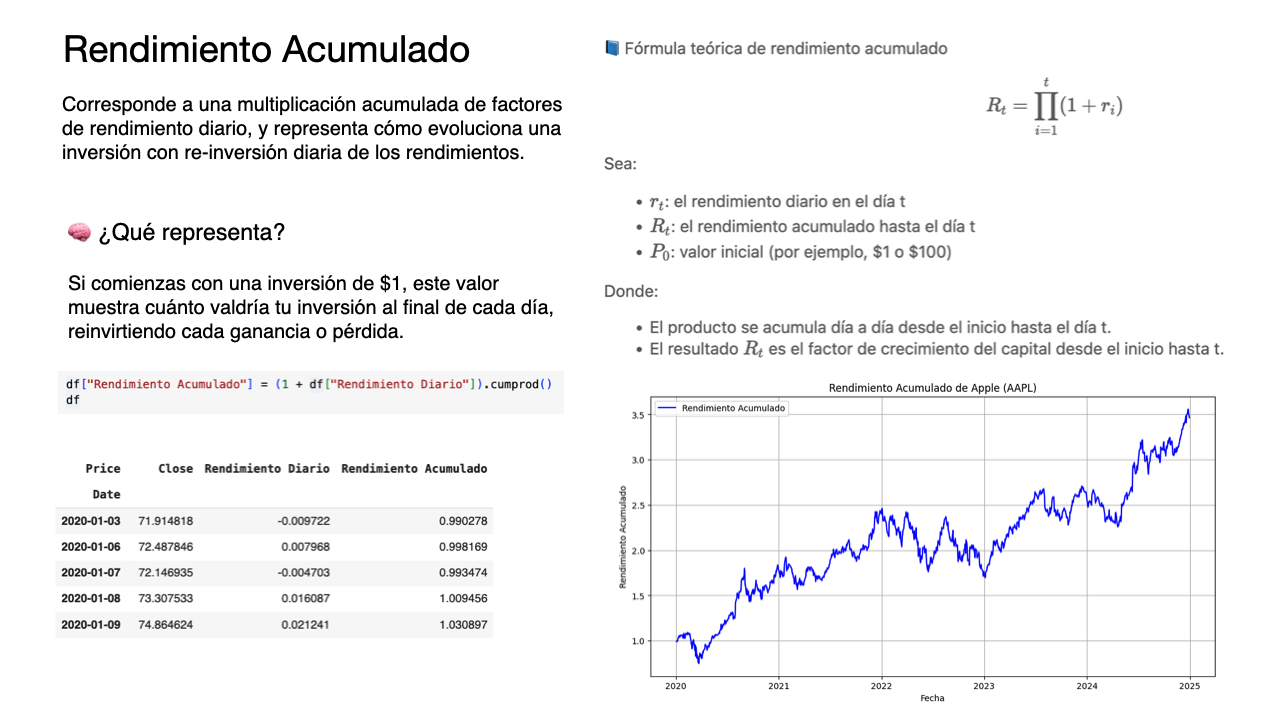

In [23]:
# Calcular el rendimiento acumulado en una nueva columna del DataFrame
df["Rendimiento Acumulado"] = (1 + df["Rendimiento Diario"]).cumprod()
print(f"\n Ticker: {ticker}")
df


 Ticker: MSFT


Price,Close,Rendimiento Diario,Rendimiento Acumulado
Date,,,
2022-01-04,318.940308,-0.017147,0.982853
2022-01-05,306.696838,-0.038388,0.945123
2022-01-06,304.273346,-0.007902,0.937655
2022-01-07,304.428497,0.000510,0.938133
2022-01-10,304.651398,0.000732,0.938820
...,...,...,...
2025-08-13,519.725647,-0.016363,1.601597
2025-08-14,521.622498,0.003650,1.607442
2025-08-15,519.316284,-0.004421,1.600336


In [24]:
a = 1 + df["Rendimiento Diario"].iloc[0]
b = 1 + df["Rendimiento Diario"].iloc[1]
c = 1 + df["Rendimiento Diario"].iloc[2]
rend_acum_2 = a*b*c
rend_acum_2
#etc...

np.float64(0.9376549309357987)

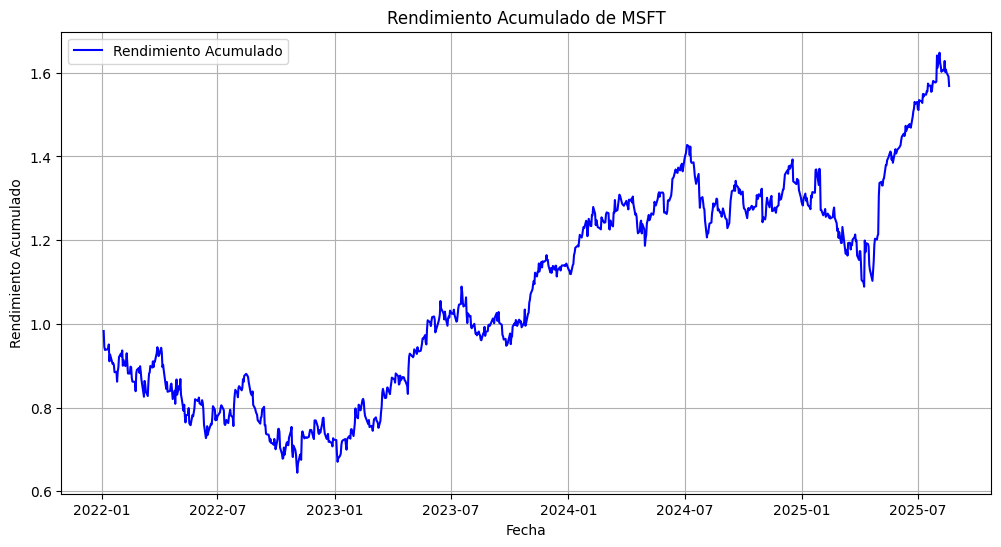

In [25]:
# Graficar el rendimiento acumulado con matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df.index, df["Rendimiento Acumulado"], label="Rendimiento Acumulado", color="blue")
plt.xlabel("Fecha")
plt.ylabel("Rendimiento Acumulado")
plt.title(f"Rendimiento Acumulado de {ticker}")
plt.grid(True)
plt.legend()
plt.show()


In [26]:
def graficar_anillo(porcentaje, indicador, size="Chico", color='Blue'):
  import matplotlib.pyplot as plt

  porcentaje_ganancia = porcentaje
  restante = 100 - porcentaje_ganancia

  if porcentaje_ganancia >= 100:
    porcentaje_ganancia = 100
    porcentaje_real = porcentaje
    etiquetas = ['Ganancia', '']
    restante = 0
  else:
    porcentaje_real = porcentaje
    etiquetas = ['Ganancia', 'Restante']

  valores = [porcentaje_ganancia, restante]
  colores = [color, 'lightgrey']

  # Definir tamaño del gráfico
  if size == "Chico":
    figsize = (3, 3)
  elif size == "Mediano":
    figsize = (5, 5)
  else:
    figsize = (10, 10)

  # Crear figura y ejes con tamaño adecuado
  fig, ax = plt.subplots(figsize=figsize)

  # Crear gráfico
  wedges, texts, autotexts = ax.pie(
      valores,
      labels=etiquetas,
      colors=colores,
      startangle=90,
      wedgeprops={'width':0.3},
      autopct='',
  )

  # Agregar círculo central blanco
  centro = plt.Circle((0, 0), 0.70, fc='white')
  ax.add_artist(centro)

  # Mostrar el porcentaje en el centro
  ax.text(0, 0, f'{porcentaje_real:.1f}%', ha='center', va='center', fontsize=24, fontweight='bold', color=color)

  plt.title(f'{indicador}')
  plt.axis('equal')
  plt.show()


 Ticker: MSFT
📈 Rendimiento acumulado total: 56.83%


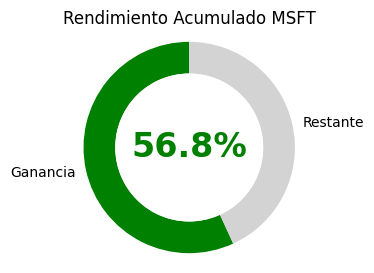

In [33]:
# Rendimiento acumulado al final, use .prod
rendimiento_final = (1 + df["Rendimiento Diario"]).prod() - 1
rendimiento_porcentual = rendimiento_final * 100

print(f"\n Ticker: {ticker}")
print(f"📈 Rendimiento acumulado total: {rendimiento_porcentual:.2f}%")
graficar_anillo(rendimiento_porcentual, f"Rendimiento Acumulado {ticker}", size="Chico", color='green')

In [28]:
# another opdion:
df["Rendimiento Acumulado"].iloc[-1] - 1

np.float64(0.5683393604302365)

#### Pregunta

* ¿En qué fecha se duplicó por primera vez la inversión?

In [29]:
# Calcular la fecha en la que el rendimiento acumulado se duplicó por primera vez
# El rendimiento acumulado comienza en 1 (representando la inversión inicial)
# Estamos buscando la primera fecha donde el rendimiento acumulado sea >= 2

fecha_duplicacion = df[df["Rendimiento Acumulado"] >= 2].index.min()

print(f"\n Ticker: {ticker}")
print(f"La inversión se duplicó por primera vez en la fecha: {fecha_duplicacion.date()}")


 Ticker: MSFT
La inversión se duplicó por primera vez en la fecha: NaT




---



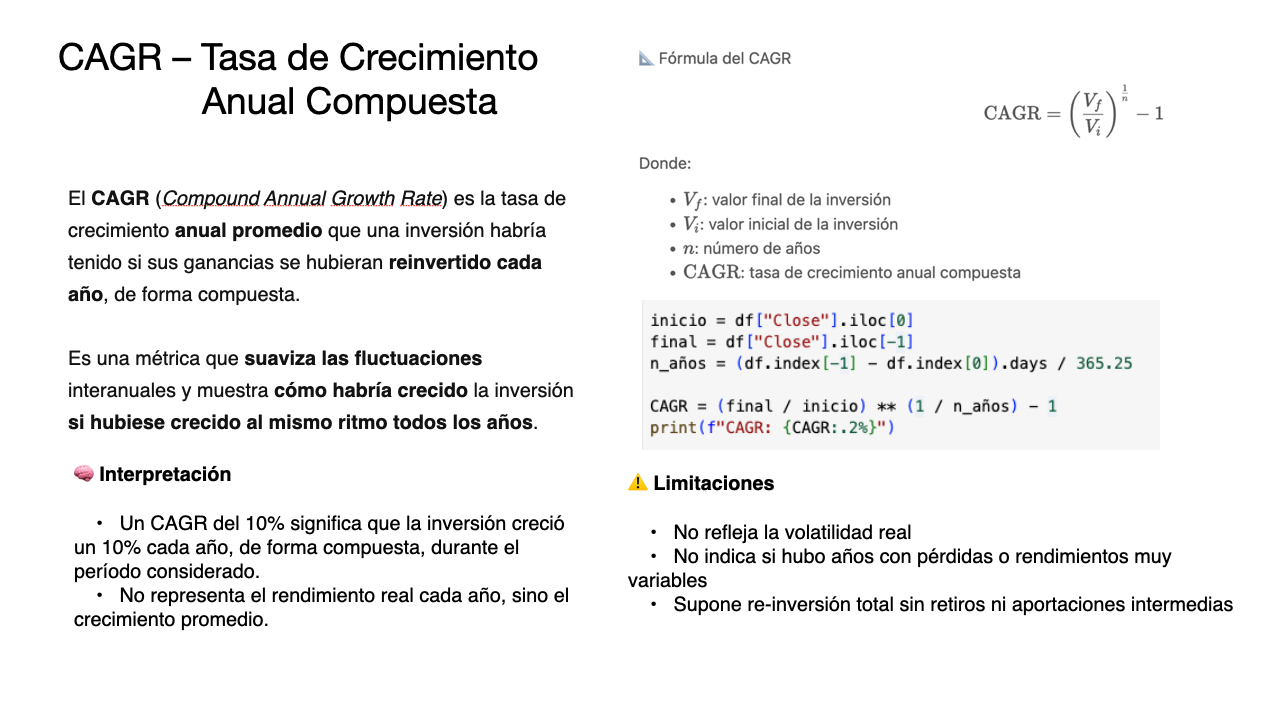

### Calcular CAGR (Tasa de Crecimiento Anual Compuesta)

In [30]:
df = df.copy()
df.index = pd.to_datetime(df.index)

inicio = df["Close"].iloc[0] # Valor inicial
final = df["Close"].iloc[-1] # Último valor

dias = (df.index[-1] - df.index[0]).days
n_años = dias / 365.25

if n_años == 0:
    CAGR = 0
else:
    CAGR = (final / inicio) ** (1 / n_años) - 1

print(f"\n Ticker: {ticker}")
print(f"📈 CAGR: {CAGR:.2%}")


 Ticker: MSFT
📈 CAGR: 13.77%


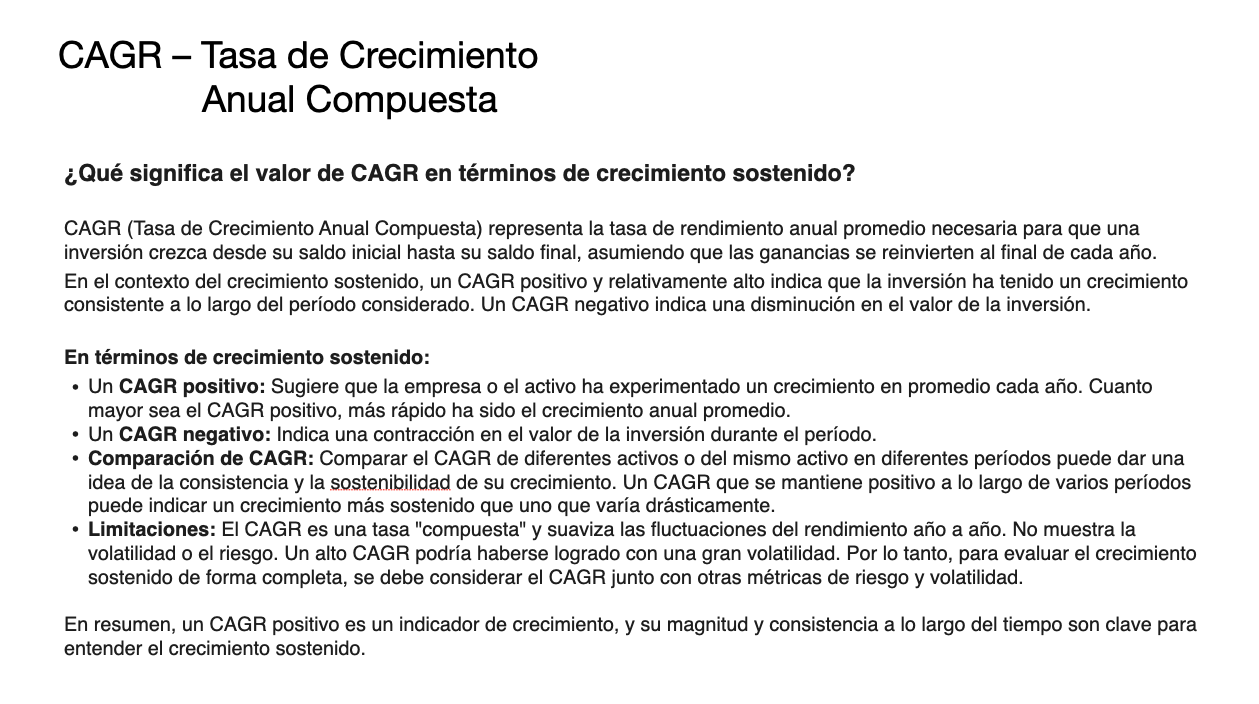



---



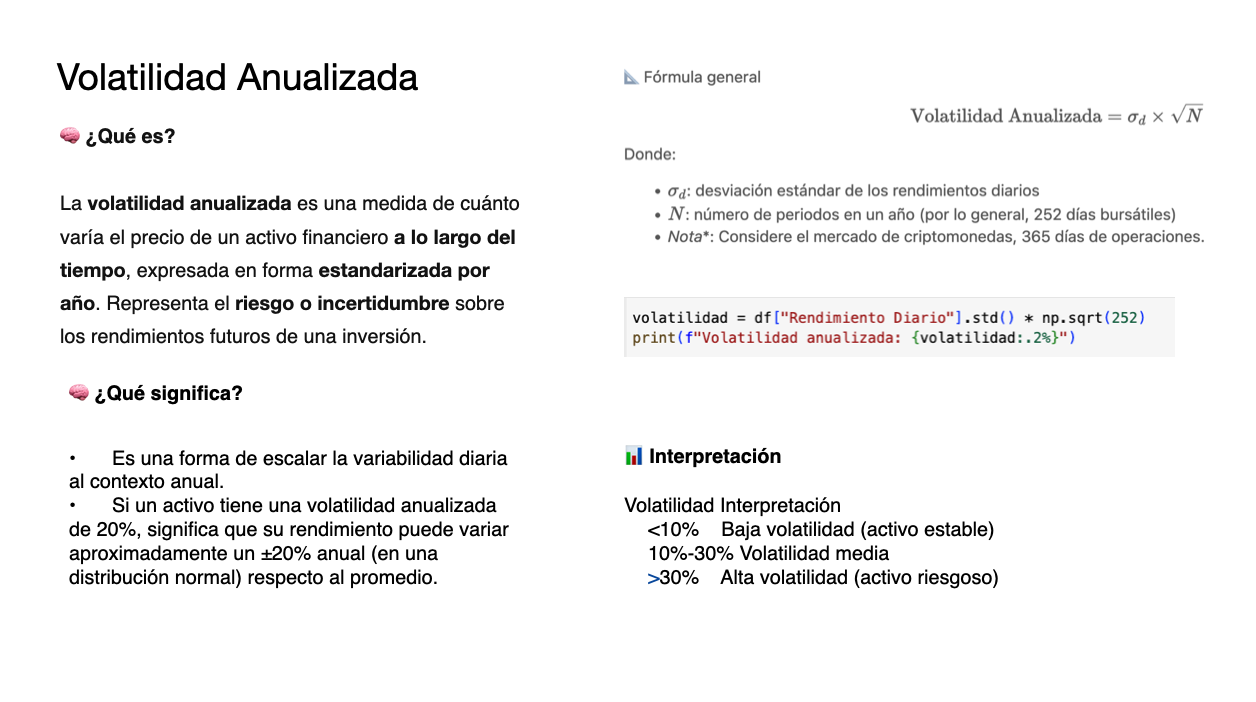

### Volatilidad anualizada

In [31]:
 # Desviación estándar de los rendimientos
vol_daily = df["Rendimiento Diario"].std()

if cripto :
    vol_annual = vol_daily * (365**0.5)  # anualizando la volatilidad
else:
    vol_annual = vol_daily * (252**0.5)  # anualizando la volatilidad
# Opción 2: vol_annual = df["Rendimiento Diario"].std() * np.sqrt(252)

print(f"\n Ticker: {ticker}")

if cripto :
    print("Calculos realizados a 365 días")
else:
    print("Calculos realizados a 252 días")

print(f"🕒 Volatilidad diaria: {vol_daily:.2%}")
print(f"📅 Volatilidad anualizada: {vol_annual:.2%}")





 Ticker: MSFT
Calculos realizados a 252 días
🕒 Volatilidad diaria: 1.74%
📅 Volatilidad anualizada: 27.55%


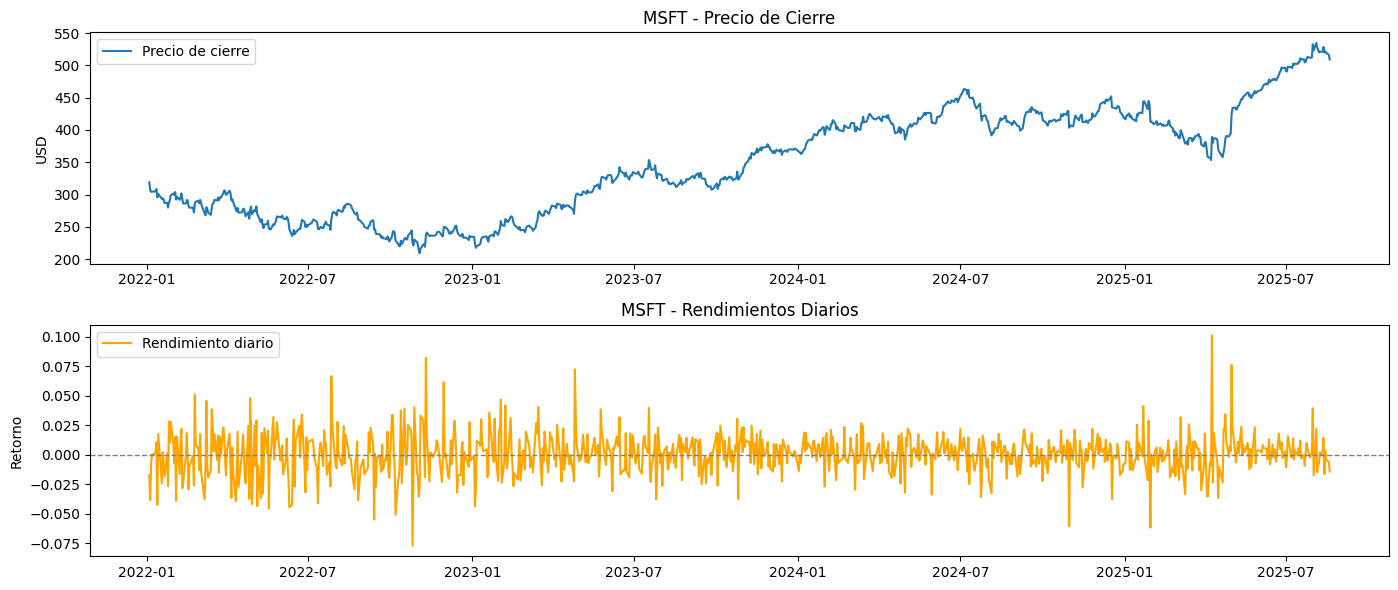

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,6))

# Gráfico de precios
plt.subplot(2,1,1)
plt.plot(df['Close'], label='Precio de cierre')
plt.title(f'{ticker} - Precio de Cierre')
plt.ylabel('USD')
plt.legend()

# Gráfico de rendimientos
plt.subplot(2,1,2)
plt.plot(df["Rendimiento Diario"], label='Rendimiento diario', color='orange')
plt.axhline(y=0, color='gray', linestyle='--', linewidth=1)
plt.title(f'{ticker} - Rendimientos Diarios')
plt.ylabel('Retorno')
plt.legend()

plt.tight_layout()
plt.show()


📅 ¿Por qué 252?
* En los mercados financieros se asume que hay aproximadamente 252 días hábiles al año, excluyendo fines de semana y feriados.



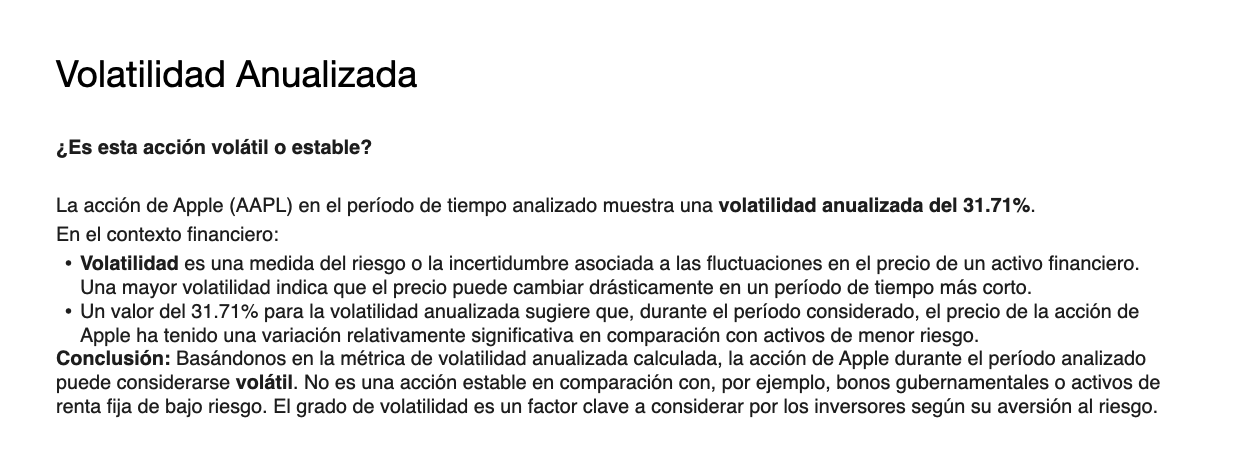



---



### 🧪 Práctica: Análisis de Rentabilidad y Volatilidad de Acciones

🎯 Objetivo:

Analizar el comportamiento de distintas acciones usando yfinance, calculando rendimiento diario, rendimiento acumulado, CAGR, y volatilidad anualizada, y evaluar si la acción elegida representa una buena inversión.

⸻

📦 Requisitos
	•	Python 3
	•	Bibliotecas: pandas, yfinance, matplotlib, numpy

⸻

🔽 Paso 1: Selección de acción

🔍 Escoge 1 de las siguientes acciones:

|Ticker|	Empresa|
|---|---|
|AAPL	|Apple Inc.|
|MSFT	|Microsoft Corp.|
|TSLA	|Tesla Inc.|
|AMZN	|Amazon.com Inc.|
|META	|Meta Platforms Inc.|
|NVDA	|NVIDIA Corp.|
|NFLX|	Netflix Inc.|
|JNJ	|Johnson & Johnson|

💬 Pregunta: ¿Por qué elegiste esta empresa?

⸻

📥 Paso 2: Descarga de datos
```

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

```



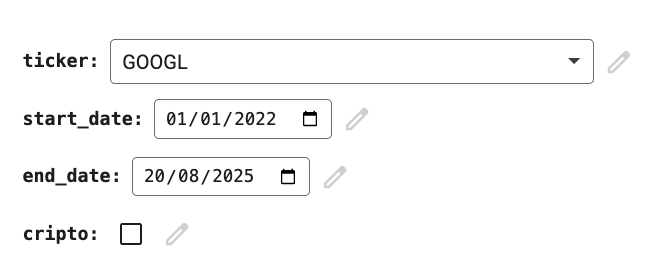
⸻



📈 Paso 3: Rendimiento Diario
```

df["Rendimiento Diario"] = df["Close"].pct_change()
```

💬 Preguntas:

* ¿Cuál fue el rendimiento diario máximo y mínimo?
* ¿Cuántos días tuvo rendimientos negativos?

⸻

📊 Paso 4: Rendimiento Acumulado
```

df["Rendimiento Acumulado"] = (1 + df["Rendimiento Diario"]).cumprod()

```

📌 Visualiza:
```

df["Rendimiento Acumulado (%)"].plot(title=f"Rendimiento acumulado - {ticker}")
plt.show()
```

💬 Pregunta:

* ¿En qué fecha la inversión duplicó su valor?

⸻

📈 Paso 5: CAGR (Tasa de Crecimiento Anual Compuesta)
```

inicio = df["Close"].iloc[0]
final = df["Close"].iloc[-1]
años = (df.index[-1] - df.index[0]).days / 365.25

CAGR = (final / inicio) ** (1 / años) - 1
print(f"CAGR: {CAGR:.2%}")
```

💬 Pregunta:

* ¿Es un crecimiento sostenido y atractivo comparado con una tasa fija (ej. CETES)?

⸻

📉 Paso 6: Volatilidad Anualizada
```

vol = df["Rendimiento Diario"].std() * np.sqrt(252)
print(f"Volatilidad anualizada: {vol:.2%}")
```

💬 Pregunta:

* ¿La acción es estable o volátil?
* ¿Estás dispuesto a asumir ese nivel de riesgo?

⸻

✅ Evaluación Final

Responde con base en tu análisis:

	1.	¿La acción tuvo un buen rendimiento acumulado?
	2.	¿El CAGR supera el 10% anual?
	3.	¿La volatilidad está por debajo del 25%?
	4.	¿Recomendarías esta acción como inversión a largo plazo?

⸻

📎 Entregables
* Código completo
* Gráfica del rendimiento acumulado
* Respuestas a las preguntas
* Conclusión personal



